In [ ]:
!pip uninstall -y deeplake
!pip install "deeplake<4"


import deeplake

# Ahora sí funciona con .load()
train_ds = deeplake.load('hub://activeloop/fer2013-train')
test_ds  = deeplake.load('hub://activeloop/fer2013-public-test')

print(train_ds.summary())



Found existing installation: deeplake 3.9.52
Uninstalling deeplake-3.9.52:
  Successfully uninstalled deeplake-3.9.52
  Using cached deeplake-3.9.52-py3-none-any.whl


/usr/local/lib/python3.12/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.4) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train



/

hub://activeloop/fer2013-train loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-public-test



-

hub://activeloop/fer2013-public-test loaded successfully.

Dataset(path='hub://activeloop/fer2013-train', read_only=True, tensors=['images', 'labels'])

 tensor      htype          shape        dtype  compression
 -------    -------        -------      -------  ------- 
 images      image     (28709, 48, 48)   uint8    None   
 labels   class_label    (28709, 1)     uint32    None   
None


In [ ]:
from collections import Counter

# Extraer todas las etiquetas del dataset
labels = [int(sample.labels.numpy()) for sample in train_ds]

# Contar todas las clases
counts_all = Counter(labels)

# Mostrar todas las emociones
emotions_all_map = {
    0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría",
    4:"Tristeza", 5:"Sorpresa", 6:"Neutral"
}

print("Conteo de todas las emociones:")
for k, name in emotions_all_map.items():
    print(f"{name}: {counts_all[k]} imágenes")


/tmp/ipython-input-3056325075.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels = [int(sample.labels.numpy()) for sample in train_ds]


Conteo de todas las emociones:
Enojo: 3995 imágenes
Asco: 436 imágenes
Miedo: 4097 imágenes
Alegría: 7215 imágenes
Tristeza: 4830 imágenes
Sorpresa: 3171 imágenes
Neutral: 4965 imágenes


In [ ]:
from collections import Counter

# Extraer todas las etiquetas del dataset
labels = [int(sample.labels.numpy()) for sample in train_ds]

# Contar cantidad por clase
counts = Counter(labels)

# Mostrar solo las 5 emociones que quieres
emotions_map = {0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría", 4:"Tristeza"}

for k, name in emotions_map.items():
    print(f"{name}: {counts[k]} imágenes")



/tmp/ipython-input-4189906785.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels = [int(sample.labels.numpy()) for sample in train_ds]


Enojo: 3995 imágenes
Asco: 436 imágenes
Miedo: 4097 imágenes
Alegría: 7215 imágenes
Tristeza: 4830 imágenes


/tmp/ipython-input-1610047050.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(sample.labels.numpy()) == label:


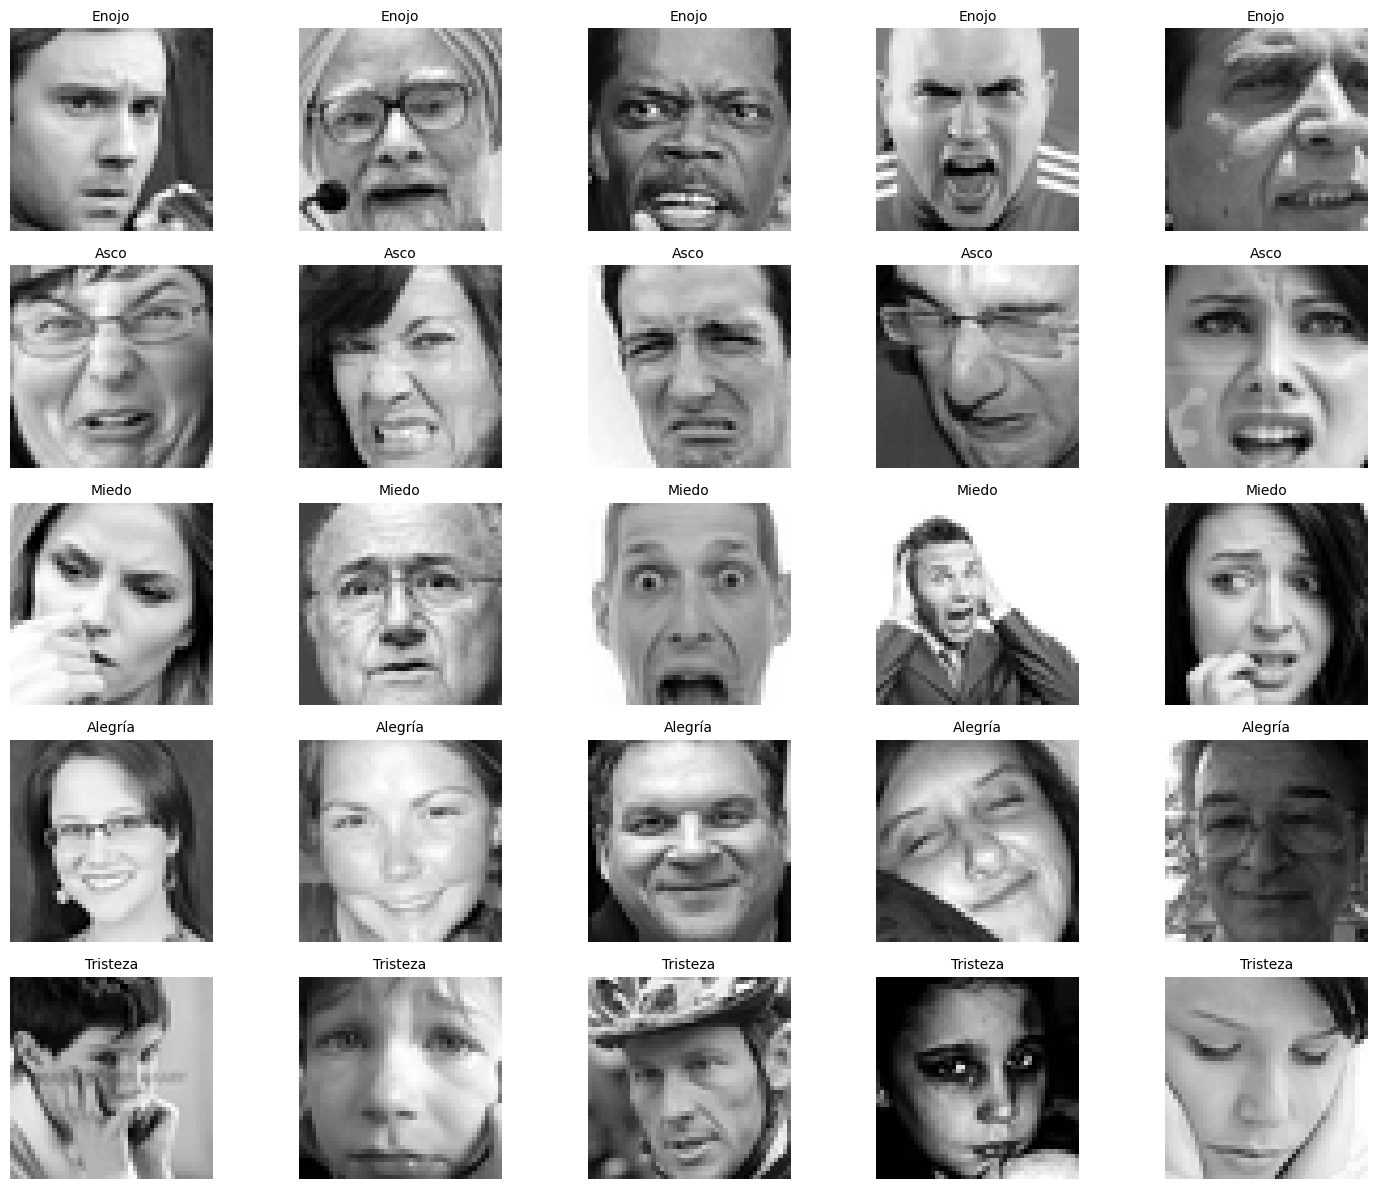

In [ ]:
import matplotlib.pyplot as plt

# Parámetros
num_images_per_emotion = 5
num_emotions = len(emotions_map)

# Crear grid: filas = emociones, columnas = imágenes por emoción
fig, axes = plt.subplots(num_emotions, num_images_per_emotion, figsize=(15, 12))

# Aplanar axes si solo hay una fila/columna
if num_emotions == 1:
    axes = [axes]
if num_images_per_emotion == 1:
    axes = [[ax] for ax in axes]

# Mostrar imágenes
for row_idx, (label, name) in enumerate(emotions_map.items()):
    count = 0
    for sample in train_ds:
        if int(sample.labels.numpy()) == label:
            axes[row_idx, count].imshow(sample.images.numpy(), cmap='gray')
            axes[row_idx, count].set_title(name, fontsize=10)
            axes[row_idx, count].axis('off')
            count += 1
        if count >= num_images_per_emotion:
            break

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# Definir las 5 emociones que quieres
emotions_map = {0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría", 4:"Tristeza"}

# Extraer etiquetas del test set y convertir de Tensor a int
test_labels = [int(sample.labels.numpy()) for sample in test_ds]

# Contar cuántas hay de cada clase
counts_test = Counter(test_labels)

# Mostrar solo las 5 emociones seleccionadas
print("Conteo de imágenes por emoción en el test set:")
for label, name in emotions_map.items():
    print(f"{name}: {counts_test[label]} imágenes")

Conteo de imágenes por emoción en el test set:
Enojo: 467 imágenes
Asco: 56 imágenes
Miedo: 496 imágenes
Alegría: 895 imágenes
Tristeza: 653 imágenes


/tmp/ipython-input-708721924.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_labels = [int(sample.labels.numpy()) for sample in test_ds]


In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from collections import Counter

# Emociones que queremos
emotions_map = {0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría", 4:"Tristeza"}

# Carpeta base donde guardar las imágenes
base_dir = "/content/emociones_dataset/train"
os.makedirs(base_dir, exist_ok=True)

# Crear subcarpetas por emoción
for name in emotions_map.values():
    Path(os.path.join(base_dir, name)).mkdir(parents=True, exist_ok=True)

# Función para guardar imagen
def save_image(img_array, path, filename):
    if img_array.max() <= 1:
        img_array = (img_array * 255).astype(np.uint8)
    else:
        img_array = img_array.astype(np.uint8)
    # Escala de grises (48,48,1) → (48,48)
    if len(img_array.shape) == 3 and img_array.shape[-1] == 1:
        img_array = img_array.squeeze(-1)
    img = Image.fromarray(img_array)
    img.save(os.path.join(path, filename))

# Contadores para nombrar archivos por clase
counters = {label:0 for label in emotions_map.keys()}

# Recorrer todo el dataset DeepLake
for i in range(len(train_ds)):
    img_tensor = train_ds[i]["images"]   # o "image" según tu dataset
    label_tensor = train_ds[i]["labels"] # o "label"

    # Convertir tensor a entero
    try:
        label = int(label_tensor.numpy())  # TensorFlow
    except:
        label = int(label_tensor.detach().cpu().numpy())  # PyTorch

    # Filtrar solo las emociones que nos interesan
    if label not in emotions_map:
        continue

    save_path = os.path.join(base_dir, emotions_map[label])
    counters[label] += 1
    filename = f"{counters[label]}.png"
    save_image(np.array(img_tensor), save_path, filename)

print("¡Train dataset exportado!")
print("Conteo final por emoción:", counters)


/tmp/ipython-input-85180618.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label_tensor.numpy())  # TensorFlow


¡Train dataset exportado!
Conteo final por emoción: {0: 3995, 1: 436, 2: 4097, 3: 7215, 4: 4830}


In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

# Carpeta base del train
base_dir = "/content/emociones_dataset/train"

# Clases
emotions_map = {0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría", 4:"Tristeza"}
TARGET = 5000  # número de imágenes deseadas por clase

# Configuración de data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Función para balancear cada clase
def balance_class(emotion_name):
    folder = os.path.join(base_dir, emotion_name)
    images = [f for f in os.listdir(folder) if f.endswith('.png')]
    n_existing = len(images)

    if n_existing >= TARGET:
        print(f"{emotion_name} ya tiene {n_existing} imágenes, no se necesita aumentar.")
        return

    print(f"Aumentando {emotion_name}: {n_existing} → {TARGET} imágenes")
    images_to_generate = TARGET - n_existing
    idx = 0

    while images_to_generate > 0:
        # Escoger imagen aleatoria
        img_file = random.choice(images)
        img_path = os.path.join(folder, img_file)
        img = Image.open(img_path)
        img_array = np.array(img)
        # Añadir canal si es escala de grises
        if len(img_array.shape) == 2:
            img_array = np.expand_dims(img_array, axis=-1)
        img_array = np.expand_dims(img_array, axis=0)  # batch de 1

        # Generar imagen aumentada
        aug_iter = datagen.flow(img_array, batch_size=1)
        aug_img = next(aug_iter)[0].astype(np.uint8)
        # Quitar canal si es gris
        if aug_img.shape[-1] == 1:
            aug_img = aug_img.squeeze(-1)
        # Guardar
        idx += 1
        new_filename = f"aug_{idx+n_existing}.png"
        Image.fromarray(aug_img).save(os.path.join(folder, new_filename))
        images_to_generate -= 1

# Aplicar balanceo a todas las clases
for label, name in emotions_map.items():
    balance_class(name)

print("✅ Dataset balanceado a 5000 imágenes por clase")


Aumentando Enojo: 3995 → 5000 imágenes
Aumentando Asco: 436 → 5000 imágenes
Aumentando Miedo: 4097 → 5000 imágenes
Alegría ya tiene 7215 imágenes, no se necesita aumentar.
Aumentando Tristeza: 4830 → 5000 imágenes
✅ Dataset balanceado a 5000 imágenes por clase


In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import shutil

# Carpeta base del train
base_dir = "/content/emociones_dataset/train"

# Clases
emotions_map = {0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría", 4:"Tristeza"}
TARGET = 5000  # número de imágenes deseadas por clase

# Configuración de data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Función para balancear cada clase
def balance_class(emotion_name):
    folder = os.path.join(base_dir, emotion_name)
    images = [f for f in os.listdir(folder) if f.endswith('.png')]
    n_existing = len(images)

    if n_existing < TARGET:
        print(f"Aumentando {emotion_name}: {n_existing} → {TARGET} imágenes")
        images_to_generate = TARGET - n_existing
        idx = 0
        while images_to_generate > 0:
            img_file = random.choice(images)
            img_path = os.path.join(folder, img_file)
            img = Image.open(img_path)
            img_array = np.array(img)
            # Añadir canal si es gris
            if len(img_array.shape) == 2:
                img_array = np.expand_dims(img_array, axis=-1)
            img_array = np.expand_dims(img_array, axis=0)  # batch de 1
            # Generar imagen aumentada
            aug_iter = datagen.flow(img_array, batch_size=1)
            aug_img = next(aug_iter)[0].astype(np.uint8)
            if aug_img.shape[-1] == 1:
                aug_img = aug_img.squeeze(-1)
            # Guardar
            idx += 1
            new_filename = f"aug_{idx+n_existing}.png"
            Image.fromarray(aug_img).save(os.path.join(folder, new_filename))
            images_to_generate -= 1

    elif n_existing > TARGET:
        print(f"Recortando {emotion_name}: {n_existing} → {TARGET} imágenes")
        images_to_remove = n_existing - TARGET
        remove_files = random.sample(images, images_to_remove)
        for f in remove_files:
            os.remove(os.path.join(folder, f))
    else:
        print(f"{emotion_name} ya tiene {TARGET} imágenes, no se necesita hacer nada.")

# Aplicar balanceo a todas las clases
for label, name in emotions_map.items():
    balance_class(name)

print("✅ Dataset balanceado exactamente a 5000 imágenes por clase")


Enojo ya tiene 5000 imágenes, no se necesita hacer nada.
Asco ya tiene 5000 imágenes, no se necesita hacer nada.
Miedo ya tiene 5000 imágenes, no se necesita hacer nada.
Recortando Alegría: 7215 → 5000 imágenes
Tristeza ya tiene 5000 imágenes, no se necesita hacer nada.
✅ Dataset balanceado exactamente a 5000 imágenes por clase


In [ ]:
import os
from collections import Counter

# Carpeta base
base_dir = "/content/emociones_dataset/train"

# Clases
emotions_map = {0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría", 4:"Tristeza"}

print("📊 Conteo de imágenes por emoción después del balanceo:")

for label, name in emotions_map.items():
    folder = os.path.join(base_dir, name)
    if os.path.exists(folder):
        n_images = len([f for f in os.listdir(folder) if f.endswith('.png')])
        print(f"{name}: {n_images} imágenes")
    else:
        print(f"{name}: Carpeta no encontrada")


📊 Conteo de imágenes por emoción después del balanceo:
Enojo: 5000 imágenes
Asco: 5000 imágenes
Miedo: 5000 imágenes
Alegría: 5000 imágenes
Tristeza: 5000 imágenes


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Carpeta de entrenamiento y validación
train_dir = "/content/emociones_dataset/train"
# (opcional) si quieres crear un pequeño validation split desde train
validation_split = 0.2  # 20% para validación

# Data augmentation para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=validation_split  # para separar validación
)

# Generador de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Generador de validación
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 clases
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,021 (4.36 MB)

 Trainable params: 1,142,021 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stop]
)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 291ms/step - accuracy: 0.3506 - loss: 1.4888 - val_accuracy: 0.3374 - val_loss: 1.5260
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 301ms/step - accuracy: 0.3838 - loss: 1.4408 - val_accuracy: 0.4096 - val_loss: 1.4199
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 295ms/step - accuracy: 0.4278 - loss: 1.3576 - val_accuracy: 0.4164 - val_loss: 1.4110
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 301ms/step - accuracy: 0.4462 - loss: 1.3316 - val_accuracy: 0.4472 - val_loss: 1.3275
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 297ms/step - accuracy: 0.4694 - loss: 1.2765 - val_accuracy: 0.4244 - val_loss: 1.4027
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 298ms/step - accuracy: 0.4883 - loss: 1.2393 - val_accuracy: 0.4636 - val_loss: 1.2837
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 309ms/step - accuracy: 0.5014 - loss: 1.2089 - val_accuracy: 0.4724 - val_loss: 1.2955
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 302ms/step - accuracy: 0.5115 - loss: 1

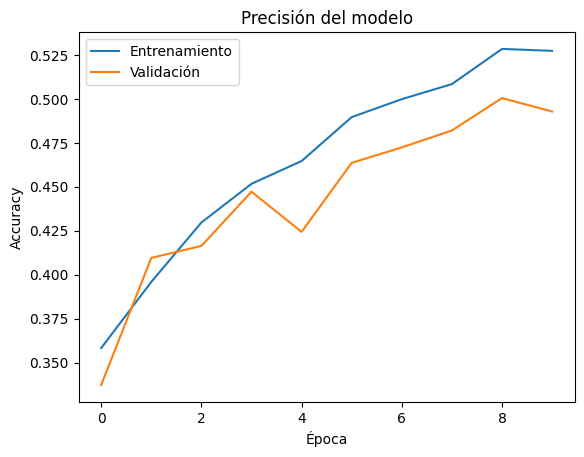

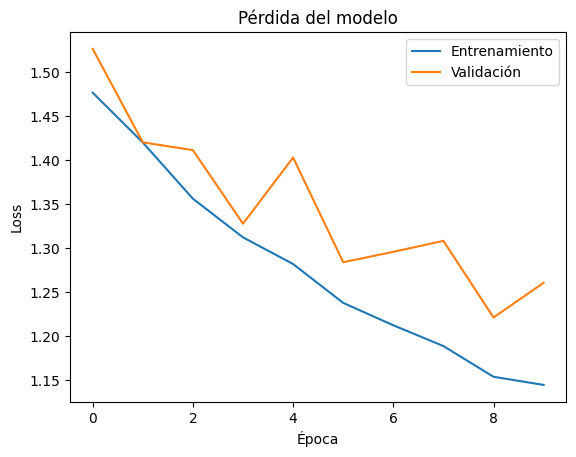

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np

# Emociones que queremos
emotions_map = {0:"Enojo", 1:"Asco", 2:"Miedo", 3:"Alegría", 4:"Tristeza"}

# Carpeta base para test
base_dir_test = "/content/emociones_dataset/test"
os.makedirs(base_dir_test, exist_ok=True)

# Crear subcarpetas por emoción
for name in emotions_map.values():
    Path(os.path.join(base_dir_test, name)).mkdir(parents=True, exist_ok=True)

# Función para guardar imagen
def save_image(img_array, path, filename):
    if img_array.max() <= 1:
        img_array = (img_array * 255).astype(np.uint8)
    else:
        img_array = img_array.astype(np.uint8)
    # Escala de grises (48,48,1) → (48,48)
    if len(img_array.shape) == 3 and img_array.shape[-1] == 1:
        img_array = img_array.squeeze(-1)
    img = Image.fromarray(img_array)
    img.save(os.path.join(path, filename))

# Contadores para nombrar archivos
counters = {label:0 for label in emotions_map.keys()}

# Recorrer todo el dataset test
for i in range(len(test_ds)):
    img_tensor = test_ds[i]["images"]   # o "image" según tu dataset
    label_tensor = test_ds[i]["labels"] # o "label"

    # Convertir a entero
    try:
        label = int(label_tensor.numpy())   # TensorFlow
    except:
        label = int(label_tensor.detach().cpu().numpy())  # PyTorch

    # Filtrar solo las emociones que nos interesan
    if label not in emotions_map:
        continue

    save_path = os.path.join(base_dir_test, emotions_map[label])
    counters[label] += 1
    filename = f"{counters[label]}.png"
    save_image(np.array(img_tensor), save_path, filename)

print("✅ Test dataset exportado con éxito")
print("Conteo final por emoción:", counters)


/tmp/ipython-input-2968041699.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label_tensor.numpy())   # TensorFlow


✅ Test dataset exportado con éxito
Conteo final por emoción: {0: 467, 1: 56, 2: 496, 3: 895, 4: 653}


In [ ]:
test_dir = "/content/emociones_dataset/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Evaluación
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


Found 2567 images belonging to 5 classes.
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6446 - loss: 0.9803
Test Accuracy: 0.5415


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step


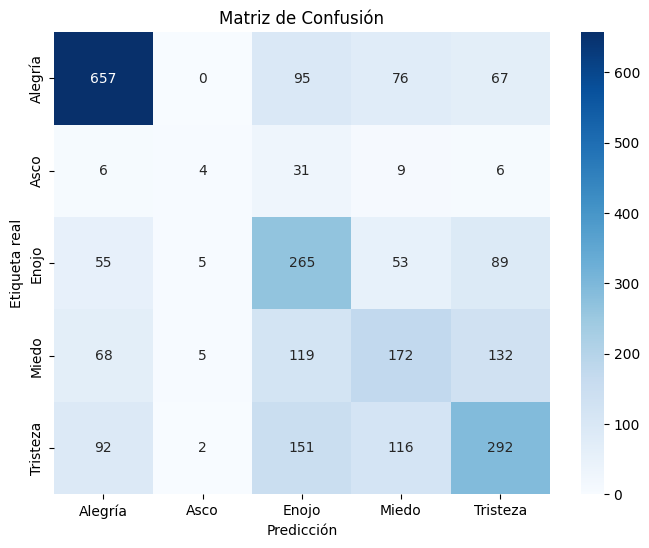

              precision    recall  f1-score   support

     Alegría       0.75      0.73      0.74       895
        Asco       0.25      0.07      0.11        56
       Enojo       0.40      0.57      0.47       467
       Miedo       0.40      0.35      0.37       496
    Tristeza       0.50      0.45      0.47       653

    accuracy                           0.54      2567
   macro avg       0.46      0.43      0.43      2567
weighted avg       0.54      0.54      0.54      2567



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Obtener predicciones en el test set
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Etiquetas verdaderas
y_true = test_generator.classes

# Nombres de clases (tomados del generador)
class_names = list(test_generator.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficar
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte detallado (precision, recall, f1 por clase)
print(classification_report(y_true, y_pred, target_names=class_names))
